## Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler #UPDATE FEATURES AT THE SAME SCALE
from sklearn.cluster import KMeans  # MARKET SEGMENTATION
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier

## Content

- [I.-Exploratory Data Analysis (EDA)](#I.-Exploratory-Data-Analysis-(EDA))
 - [I.1.-Missing Values](#I.1.-Missing-Values)
 - [I.2.-Statistical plots](#I.2.-Statistical-plots)
 - [I.3.-Scaling](#I.3.-Scaling)
 - [I.4.-Principal component analysis (PCA)](#I.4.-Principal-component-analysis-(PCA))
- [II.-Determining the number of clusters](#II.-Determining-the-number-of-clusters)
 - [II.1.-Elbow method](#II.-Elbow-method)
 - [II.2.-Silhouette Coefficient](#II.2.-Silhouette-Coefficient)
- [III.-Modelling](#III.-Modelling)



## I.-Exploratory Data Analysis (EDA)

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')#open and reading a csv
#path = '/content/CC GENERAL.csv'
#creditcard_df = pd.read_csv(path)
creditcard_df = pd.read_csv('Marketing_data.csv')

In [3]:
creditcard_df.shape#checking size of the dataframe

(8950, 18)

In [4]:
creditcard_df.head() #seeing the first 5 rows

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
creditcard_df.info()#printing summary of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
creditcard_df.describe()##looking at the five-number summary  of Statistic

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### I.1.-Missing Values

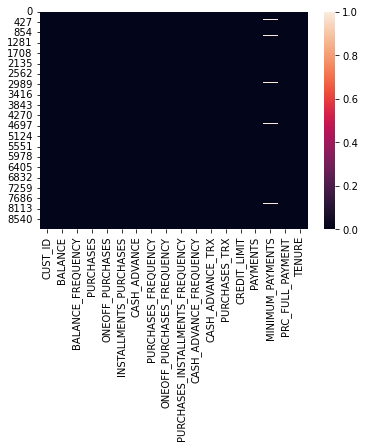

In [7]:
# Visualization of the missing values.
sns.heatmap(creditcard_df.isnull());

In [8]:
creditcard_df.isnull().sum()  # Checking missing values.

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
creditcard_df['MINIMUM_PAYMENTS'].mean()# Checking mean of the column with missing Values= 'MINIMUM_PAYMENTS'

864.2065423050816

In [10]:
# Localizing the missing values in the column 'MINIMUM_PAYMENTS' and overwriting the mean of the column
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [11]:
#Checking the mean of the column with missing Values= 'CREDIT_LIMIT'
creditcard_df['CREDIT_LIMIT'].mean()

4494.449450364621

In [12]:
# Localizing the missing values in the column 'CREDIT_LIMIT and overwriting the mean of the column
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [13]:
# Checking missing values after the overwriting using mean
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

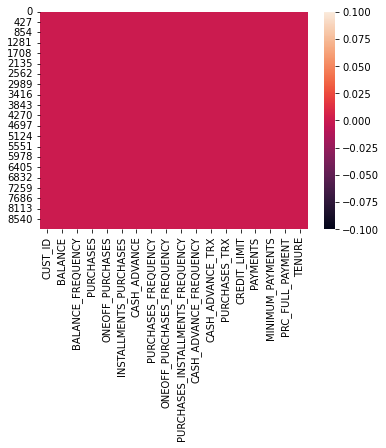

In [14]:
# Visualization of the missing values after the overwriting using mean
sns.heatmap(creditcard_df.isnull());

In [15]:
## Checking duplicated information
creditcard_df.duplicated().sum()

0

In [16]:
#dropping 'CUST_ID'columns
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [17]:
creditcard_df.head()#looking at first 5 rows  after dropping ID column

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [18]:
creditcard_df.columns#looking at the columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [19]:
len(creditcard_df.columns)#It has 17 column

17

### I.2.-Statistical plots

In [20]:
"""## plotting the distribution of each column
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
    plt.subplot(17, 1, i + 1) ## KDE = kernel density estimate to smooth the distribution as line
    ax=sns.histplot(creditcard_df[creditcard_df.columns[i]], kde = True, line_kws={'linewidth': 2})
    ax.lines[0].set_color('crimson')
    plt.title(creditcard_df.columns[i])
    plt.legend('KDE')
    plt.tight_layout();"""

"## plotting the distribution of each column\nplt.figure(figsize=(10,50))\nfor i in range(len(creditcard_df.columns)):\n    plt.subplot(17, 1, i + 1) ## KDE = kernel density estimate to smooth the distribution as line\n    ax=sns.histplot(creditcard_df[creditcard_df.columns[i]], kde = True, line_kws={'linewidth': 2})\n    ax.lines[0].set_color('crimson')\n    plt.title(creditcard_df.columns[i])\n    plt.legend('KDE')\n    plt.tight_layout();"

<AxesSubplot:>

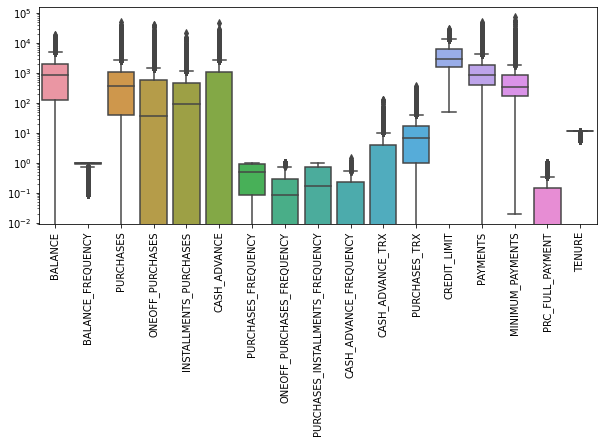

In [21]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10,4))
ax.set_yscale("log")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.boxplot(data=creditcard_df)

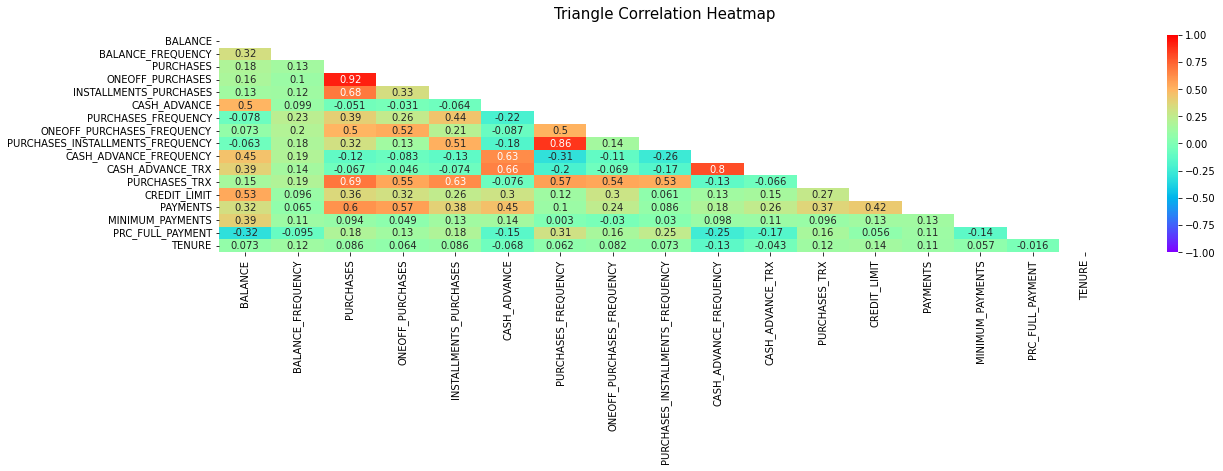

In [22]:
## checking the Pearson correlation
from warnings import filterwarnings #Avoiding warning messages
filterwarnings(action='ignore', category=DeprecationWarning, message='`np.bool` is a deprecated alias')

plt.figure(figsize = (20,4))#setting size of figure

#creating a triangle mask with Pearson Correlation
mask = np.triu(np.ones_like(creditcard_df.corr(method = "pearson"), dtype=np.bool))

#creating a Heatmap, with Pearson Correlation And adding the triangle mask
heatmap= sns.heatmap(creditcard_df.corr(), mask=mask, vmin=-1, vmax=1, annot = True, cmap="rainbow")
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':15}, pad=16);#setting title
heatmap.tick_params(labelsize=10)# label size
plt.show()

### I.3.-Scaling


In [23]:
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE']) #The difference in scale is to big. We need to use a scaler to put on the same scaler.

(0.0, 19043.13856)

In [24]:
#Let's use the Standard Scaler
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [25]:
type(creditcard_df_scaled), type(creditcard_df)#looking at the type information of both after and before scaling

(numpy.ndarray, pandas.core.frame.DataFrame)

In [26]:
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0])#Checking the array after scaling

(-0.9604333444542572, 0.36067954425377496)

In [27]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

### I.4.-Principal component analysis (PCA)

PCA df
Original shape: (8950, 17)
Reduced shape: (8950, 17)


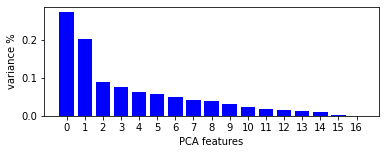

PCA Overview
Total: 17 components
------------------------------
Mean explained variance: 0.059
------------------------------
    explained variance  cumulative
1         2.729004e-01    0.272900
2         2.030199e-01    0.475920
3         8.791979e-02    0.563840
4         7.479975e-02    0.638640
5         6.262792e-02    0.701268
6         5.750211e-02    0.758770
7         4.887235e-02    0.807642
8         4.257486e-02    0.850217
9         3.828804e-02    0.888505
10        3.080006e-02    0.919305
11        2.371897e-02    0.943024
12        1.773632e-02    0.960760
13        1.426492e-02    0.975025
14        1.217369e-02    0.987199
15        1.012990e-02    0.997329
16        2.670336e-03    0.999999
17        6.852235e-07    1.000000
------------------------------


In [28]:
# keep the first four principal components of the data
print("PCA df")
pca = PCA()#n_components = 20
# fit PCA model 
principalComponents = pca.fit(creditcard_df_scaled)
# transform data onto the first two principal components
df_X_pca  = pca.transform(creditcard_df_scaled)
print("Original shape: {}".format(str(creditcard_df_scaled.shape)))
print("Reduced shape: {}".format(str(df_X_pca.shape)))


# Plot the explained variances
plt.figure(figsize=(6, 2))
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='blue')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

n_components = len(pca.explained_variance_ratio_)
explained_variance = pca.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance)
idx = np.arange(n_components)+1

df_explained_variance = pd.DataFrame([explained_variance, cum_explained_variance], 
                                      index=['explained variance', 'cumulative'],
                                      columns=idx).T

                                      

plt.show()
mean_explained_variance = df_explained_variance.iloc[:,0].mean() # calculate mean explained variance
# Print explained variance as plain text
print('PCA Overview')
print('='*30)
print("Total: {} components".format(n_components))
print('-'*30)
print('Mean explained variance:', round(mean_explained_variance,3))
print('-'*30)
print(df_explained_variance.head(20))
print('-'*30)

## II.-Determining the number of clusters

### II.1.-Elbow Method

In [29]:
distortions = []# the average of the squared distances 
inertias = []#sum of squared distances of samples to their closest cluster center.
map1 = {}
map2 = {}
K= range(1, 8)
for i in K:
    # Building and fitting the model
    Model = KMeans(n_clusters=i).fit(creditcard_df_scaled)
    Model.fit(creditcard_df_scaled)
    label = Model.labels_
 
    distortions.append(sum(np.min(cdist(creditcard_df_scaled, Model.cluster_centers_,
                                        'euclidean'), axis=1)) / creditcard_df_scaled.shape[0])
    inertias.append(Model.inertia_)
 
    map1[i] = sum(np.min(cdist(creditcard_df_scaled, Model.cluster_centers_,
                                   'euclidean'), axis=1)) / creditcard_df_scaled.shape[0]
    map2[i] = Model.inertia_

In [30]:
for key, val in map1.items():
    print(f'{key} : {val}')

1 : 3.525083325834247
2 : 3.144172873624612
3 : 3.0277368509009133
4 : 2.818894225263103
5 : 2.7169755097662205
6 : 2.5625464564300073
7 : 2.465557725394282


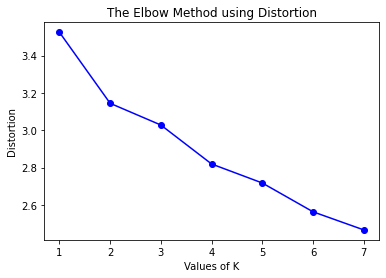

In [31]:
plt.plot(K, distortions, 'bo-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [32]:
for key, val in map2.items():
    print(f'{key} : {val}')

1 : 152150.00000000006
2 : 127785.06996309498
3 : 111986.74707959313
4 : 99073.9438413193
5 : 91503.39081843373
6 : 84852.4543064239
7 : 79528.0455815382


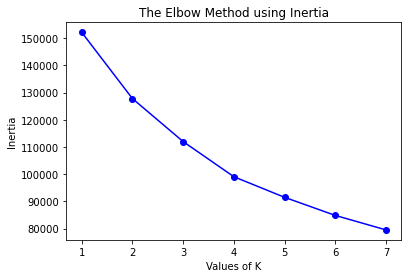

In [33]:
plt.plot(K, inertias, 'bo-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

### II.2.-Silhouette Coefficient

Silhouette analysis can be used to study the separation distance between the resulting clusters. This measure has a range of [-1, 1].

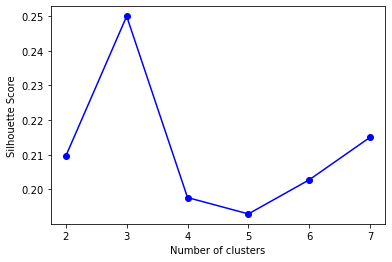

In [34]:
silhouette_scores = [] 

for k in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(creditcard_df_scaled, KMeans(n_clusters = k).fit_predict(creditcard_df_scaled)))
    # Plotting a bar graph to compare the results 
k = [2, 3, 4, 5 , 6 ,7] 
plt.plot(k, silhouette_scores, "bo-") 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 

plt.show() 

### II.3.-Autoencoders

In [35]:
# 17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [36]:
input_df = Input(shape=(17,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x)

In [37]:
# autoencoder
autoencoder = Model(input_df, decoded)

In [38]:
# encoder
encoder = Model(input_df, encoded)

In [39]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [40]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs = 50)

Epoch 1/50
280/280 [==============================] - 5s 16ms/step - loss: 0.2029
Epoch 2/50
280/280 [==============================] - 4s 16ms/step - loss: 0.1012
Epoch 3/50
280/280 [==============================] - 4s 15ms/step - loss: 0.1090
Epoch 4/50
280/280 [==============================] - 4s 16ms/step - loss: 0.0724
Epoch 5/50
280/280 [==============================] - 4s 16ms/step - loss: 0.0559
Epoch 6/50
280/280 [==============================] - 4s 15ms/step - loss: 0.0528
Epoch 7/50
280/280 [==============================] - 5s 16ms/step - loss: 0.0535
Epoch 8/50
280/280 [==============================] - 4s 16ms/step - loss: 0.0546
Epoch 9/50
280/280 [==============================] - 4s 16ms/step - loss: 0.0527
Epoch 10/50
280/280 [==============================] - 4s 16ms/step - loss: 0.0457
Epoch 11/50
280/280 [==============================] - 4s 16ms/step - loss: 0.0417
Epoch 12/50
280/280 [==============================] - 4s 15ms/step - loss: 0.0472
Epoch 13/50
2

In [41]:
creditcard_df_scaled.shape

(8950, 17)

In [42]:
compact = encoder.predict(creditcard_df_scaled)
compact.shape

(8950, 10)

In [43]:
creditcard_df_scaled[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [44]:
compact[0]

array([0.37562323, 0.3744643 , 0.        , 0.        , 0.        ,
       0.49484438, 0.        , 0.90422034, 0.4272396 , 1.0244747 ],
      dtype=float32)

In [45]:
wcss_2 = []
range_values = range(1, 8)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(compact)
    wcss_2.append(kmeans.inertia_)

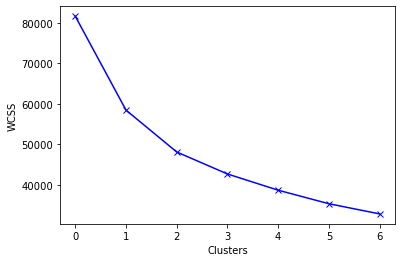

In [46]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

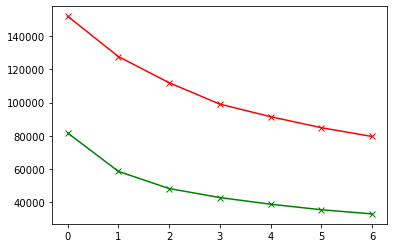

In [47]:
plt.plot(inertias, 'bx-', color = 'r')
plt.plot(wcss_2, 'bx-', color = 'g');

In [48]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(compact)

KMeans(n_clusters=4)

## III.-Modelling

In [49]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.mixture import GaussianMixture
from fcmeans import FCM
from sklearn import metrics
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.metrics import davies_bouldin_score

#from sklearn.model_selection import GridSearchCV

https://scikit-learn.org/stable/modules/clustering.html#clustering

In [50]:
#Let's use the Standard Scaler
scaler = StandardScaler()
df= creditcard_df.values
df= scaler.fit_transform(df)
x=compact 

#creating list
models = ['KMeans', 'Agglomerative Clustering',' FCM',
          'GaussianMixture', 'Birch']
Cluster = []
Score_Silhouette = []
Score_Calinski_Harabasz = []
Score_Davies_Bouldin = []

Silhouette Score: 0.47122958302497864


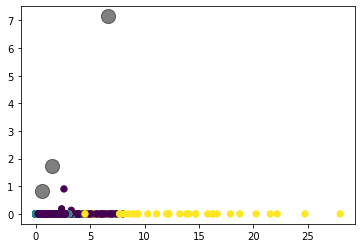

In [51]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 38)
y_kmeans = kmeans.fit_predict(x)
centers = kmeans.cluster_centers_


# Visualising the clusters using scatter() method
plt.scatter(x[:,0], x[:,3], c=y_kmeans, s=40, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


# Plotting the centroids of the clusters
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'yellow', label = 'Centroids')
#plt.legend(loc ="best") 
# Display the silhouette score values
print(f'Silhouette Score: {silhouette_score(x, y_kmeans)}')

# Create an additional column in the dataframe (df) as KMeans_labels
Cluster.append('3')
Score_Silhouette.append(silhouette_score(x, y_kmeans))
Score_Calinski_Harabasz.append(metrics.calinski_harabasz_score(x, y_kmeans))
Score_Davies_Bouldin.append(davies_bouldin_score(x, y_kmeans))

Silhouette Score: 0.40776872634887695


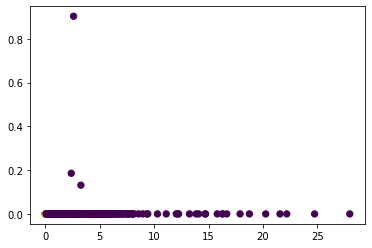

In [52]:
kmeans = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_kmeans = kmeans.fit_predict(x)

# Visualising the clusters using scatter() method
plt.scatter(x[:,0], x[:,3], c=y_kmeans, s=40, cmap='viridis')

print(f'Silhouette Score: {silhouette_score(x, y_kmeans)}')

# Create an additional column in the dataframe (df) as KMeans_labels
Cluster.append('2')
Score_Silhouette.append(silhouette_score(x, y_kmeans))
Score_Calinski_Harabasz.append(metrics.calinski_harabasz_score(x, y_kmeans))
Score_Davies_Bouldin.append(davies_bouldin_score(x, y_kmeans))

Silhouette Score: 0.4797784388065338


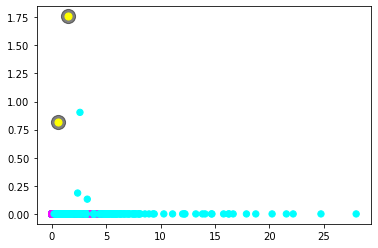

In [53]:
kmeans = FCM(n_clusters =2)
y_kmeans = kmeans.fit(x)
centers = kmeans.centers
# argmax: Returns the indices of the maximum values along an axis.
fcm_labels = kmeans.u.argmax(axis = 1)

# Visualising the clusters using scatter() method
plt.scatter(x[:,0], x[:,3], c=fcm_labels, s=40, cmap='cool')
# Plotting the centroids of the clusters
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.scatter(centers[:, 0], centers[:,1], s = 50, c = 'yellow', label = 'Centroids')
# Display the silhouette score values
print(f'Silhouette Score: {silhouette_score(x, fcm_labels)}')
# Create an additional column in the dataframe (df) as KMeans_labels
Cluster.append('2')
Score_Silhouette.append(silhouette_score(x, fcm_labels))
Score_Calinski_Harabasz.append(metrics.calinski_harabasz_score(x, fcm_labels))
Score_Davies_Bouldin.append(davies_bouldin_score(x, fcm_labels))

Silhouette Score: 0.5394034385681152


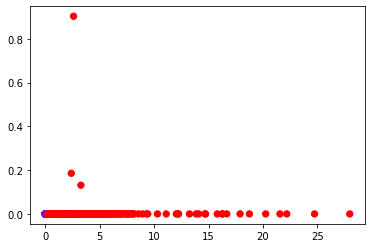

In [54]:
kmeans =  GaussianMixture(n_components=2)
y_kmeans = kmeans.fit(x)
labels= y_kmeans.predict(x)

# Visualising the clusters using scatter() method
plt.scatter(x[:,0], x[:,3],c=labels,s=40, cmap='rainbow')
# Display the silhouette score values
print(f'Silhouette Score: {silhouette_score(x, labels)}')

# Create an additional column in the dataframe 
Cluster.append('2')
Score_Silhouette.append(silhouette_score(x,labels))
Score_Calinski_Harabasz.append(metrics.calinski_harabasz_score(x, labels))
Score_Davies_Bouldin.append(davies_bouldin_score(x, labels))

Silhouette Score: 0.7587530612945557


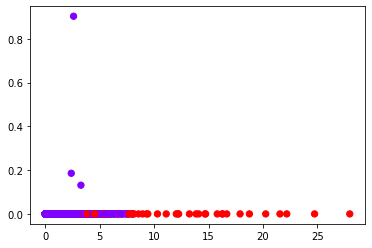

In [55]:
kmeans = Birch(n_clusters=2)
y_kmeans = kmeans.fit(x)

# Visualising the clusters using scatter() method
plt.scatter(x[:,0], x[:,3], c=kmeans.labels_,  s=40, cmap='rainbow')
# Display the silhouette score values
print(f'Silhouette Score: {silhouette_score(x, kmeans.labels_)}')

# Create an additional column in the dataframe (df) as KMeans_labels
Cluster.append('2')
Score_Silhouette.append(silhouette_score(x, kmeans.labels_))
Score_Calinski_Harabasz.append(metrics.calinski_harabasz_score(x, kmeans.labels_))
Score_Davies_Bouldin.append(davies_bouldin_score(x, kmeans.labels_))

In [56]:
allResults= pd.DataFrame()
allResults['Model'] = models
allResults['N° Clusters'] = Cluster
allResults['Silhouette Score'] = Score_Silhouette
allResults['Calinski-Harabasz Score'] = Score_Calinski_Harabasz
allResults['Davies_Bouldin Score'] = Score_Davies_Bouldin
allResults

,Model,N° Clusters,Silhouette Score,Calinski-Harabasz Score,Davies_Bouldin Score
0,KMeans,3,0.471230,3125.290745,1.291958
1,Agglomerative Clustering,2,0.407769,2816.259354,1.457417
2,FCM,2,0.479778,3419.059642,1.340521
3,GaussianMixture,2,0.539403,3166.407659,1.388819
4,Birch,2,0.758753,2263.512588,1.069035


* The Silhouette Coefficient goes from -1 to 1. Scores around zero reveals overlapping clusters.
* Calinski-Harabasz index or the Variance Ratio Criterion indicates that highest score is relates to a model with better defined clusters.
* The Davies-Bouldin index evidences where a lower Davies-Bouldin index relates to a model with better separation between the clusters.

How one can appreciete in the table Kmeans and FMC are the algoritms that performance better. We are using 3 cluster for KmMeans and 2 for FCM.

### III.1.- K Means

In [57]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [58]:
labels, len(labels)

(array([1, 2, 1, ..., 1, 1, 1]), 8950)

In [59]:
np.unique(labels, return_counts=True)

(array([0, 1, 2]), array([1253, 6107, 1590], dtype=int64))

In [60]:
kmeans.cluster_centers_

array([[ 0.30512572,  0.43979039,  1.5105117 ,  1.26706811,  1.2433397 ,
        -0.2494047 ,  1.1421283 ,  1.56297847,  0.94383357, -0.3612913 ,
        -0.25269903,  1.66542803,  0.87693994,  0.82362267,  0.16088196,
         0.50301305,  0.29865793],
       [-0.36610938, -0.17876383, -0.23455381, -0.20613805, -0.1757844 ,
        -0.30911717, -0.06681888, -0.24095033, -0.0492403 , -0.333429  ,
        -0.29829274, -0.24606482, -0.33712485, -0.28505746, -0.13250955,
         0.00344732, -0.02841935],
       [ 1.16572795,  0.34003355, -0.28946605, -0.20676181, -0.30464737,
         1.38382557, -0.64341121, -0.30624425, -0.55466222,  1.56537666,
         1.34484632, -0.36733551,  0.60378346,  0.44581554,  0.38217028,
        -0.40964035, -0.12620213]])

In [61]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.305126,0.439790,1.510512,1.267068,1.243340,-0.249405,1.142128,1.562978,0.943834,-0.361291,-0.252699,1.665428,0.876940,0.823623,0.160882,0.503013,0.298658
1,-0.366109,-0.178764,-0.234554,-0.206138,-0.175784,-0.309117,-0.066819,-0.240950,-0.049240,-0.333429,-0.298293,-0.246065,-0.337125,-0.285057,-0.132510,0.003447,-0.028419
2,1.165728,0.340034,-0.289466,-0.206762,-0.304647,1.383826,-0.643411,-0.306244,-0.554662,1.565377,1.344846,-0.367336,0.603783,0.445816,0.382170,-0.409640,-0.126202


In [62]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,2199.568262,0.981453,4230.436369,2695.510910,1535.404310,455.857802,0.948742,0.668724,0.739541,0.062846,1.524342,56.106145,7685.115722,4117.450780,1239.135172,0.300837,11.916999
1,802.449062,0.834923,502.076995,250.290431,252.107992,330.637963,0.463533,0.130578,0.344868,0.068422,1.213198,8.593581,3267.851324,907.930434,555.398616,0.154723,11.479286
2,3990.839154,0.957822,384.756151,249.255119,135.578811,3880.817980,0.232119,0.111099,0.144000,0.448392,12.426415,5.579245,6691.260720,3023.736154,1754.838260,0.033902,11.348428


In [63]:
labels, len(labels)

(array([1, 2, 1, ..., 1, 1, 1]), 8950)

In [64]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


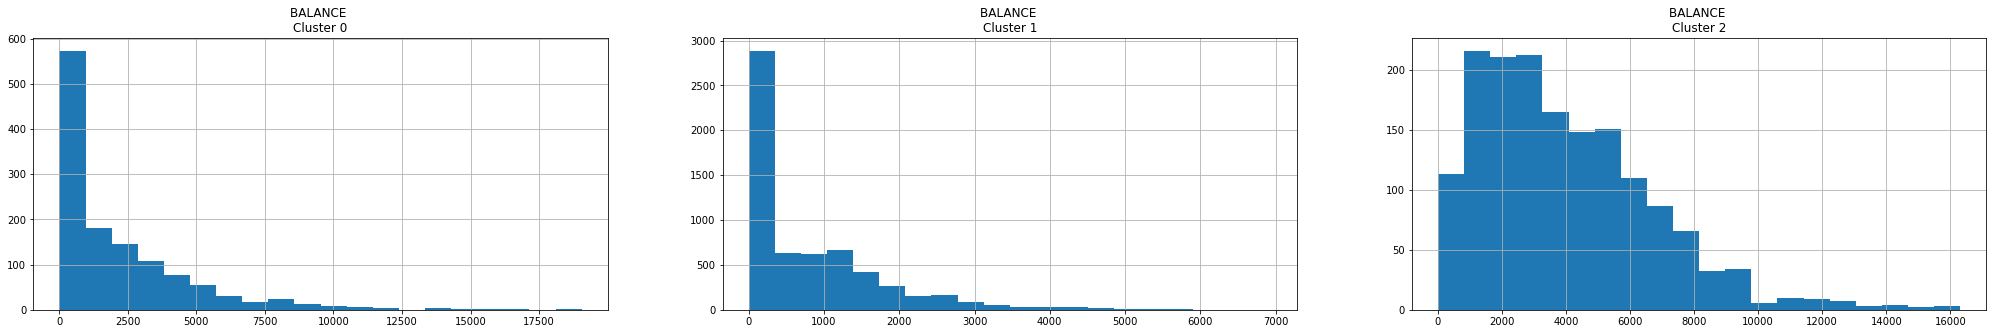

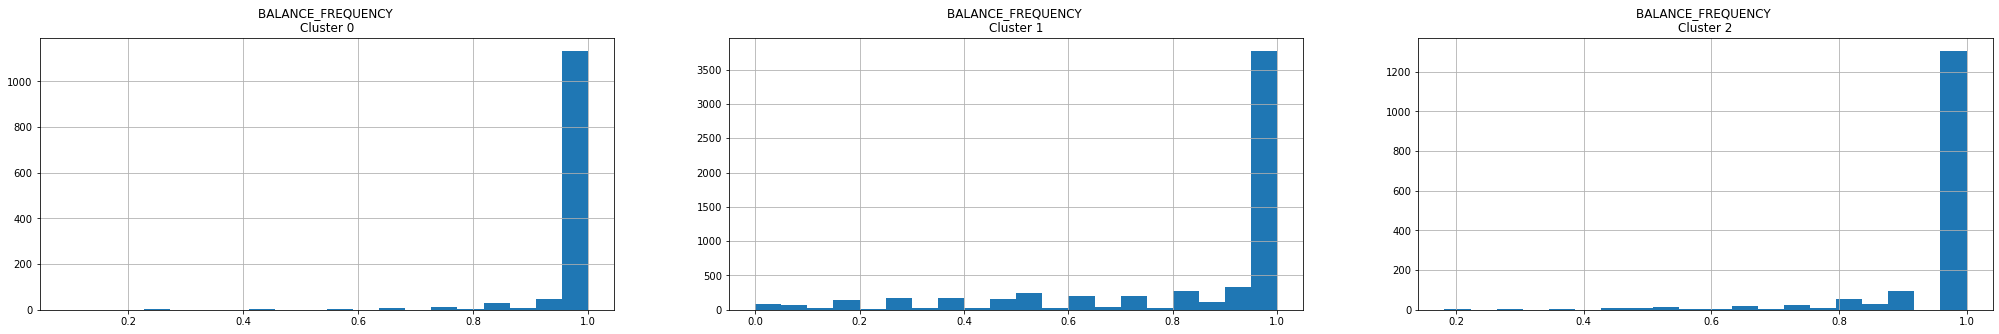

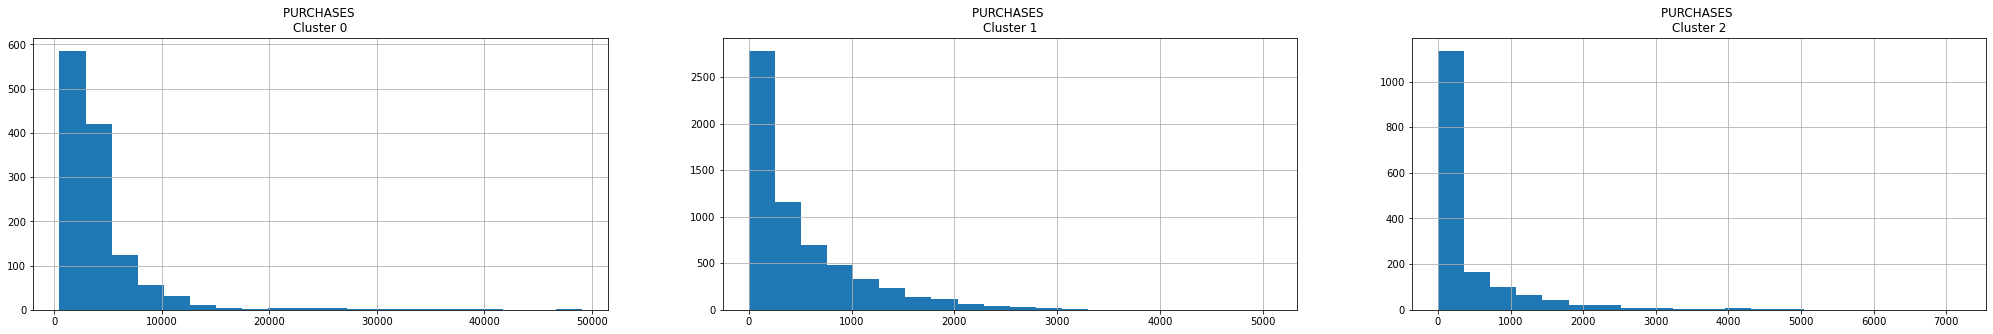

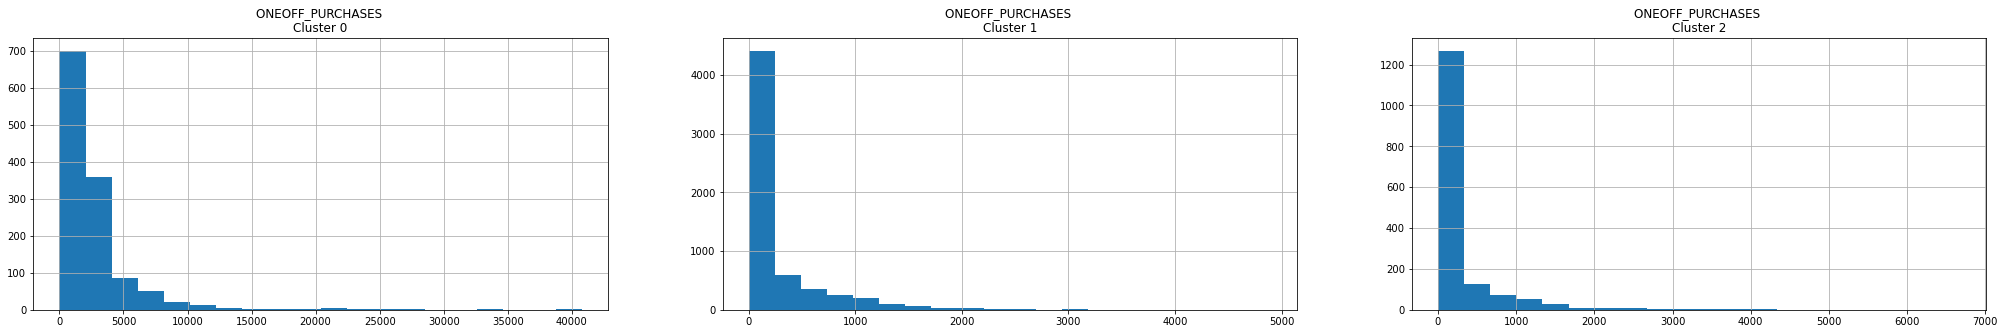

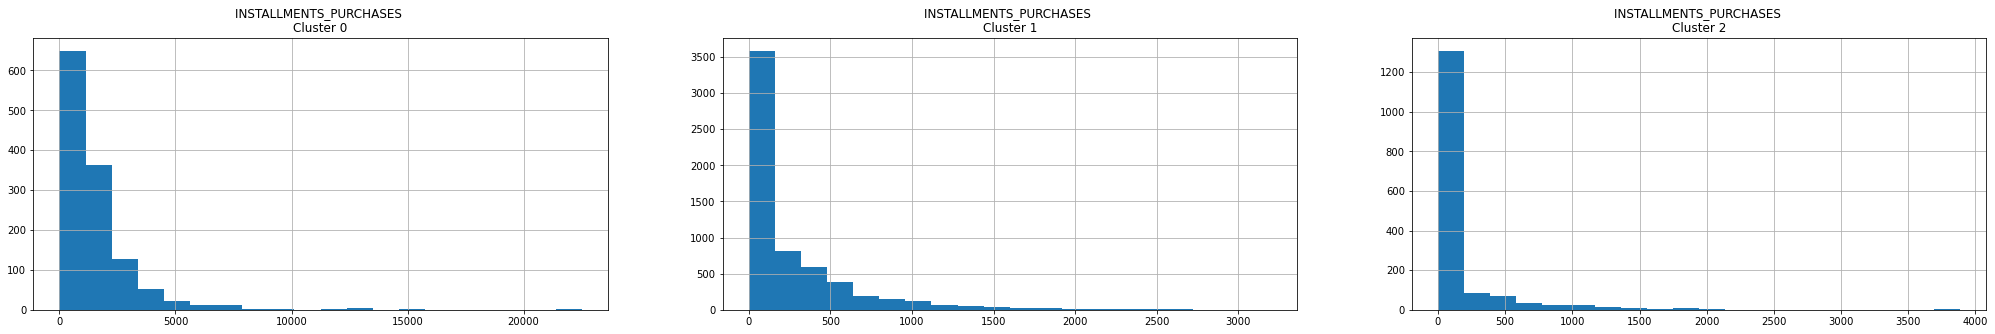

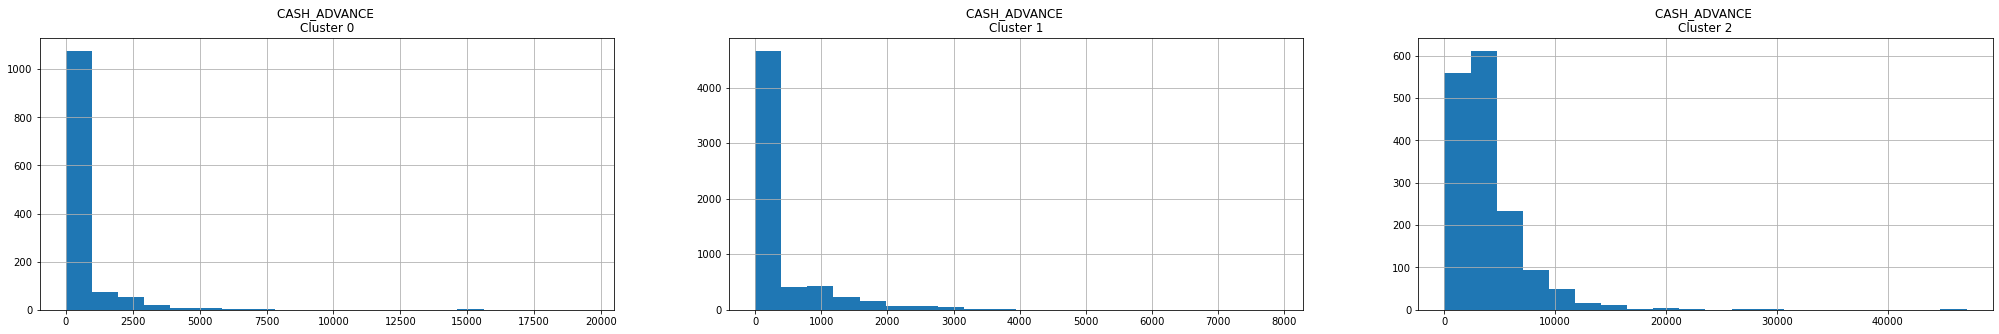

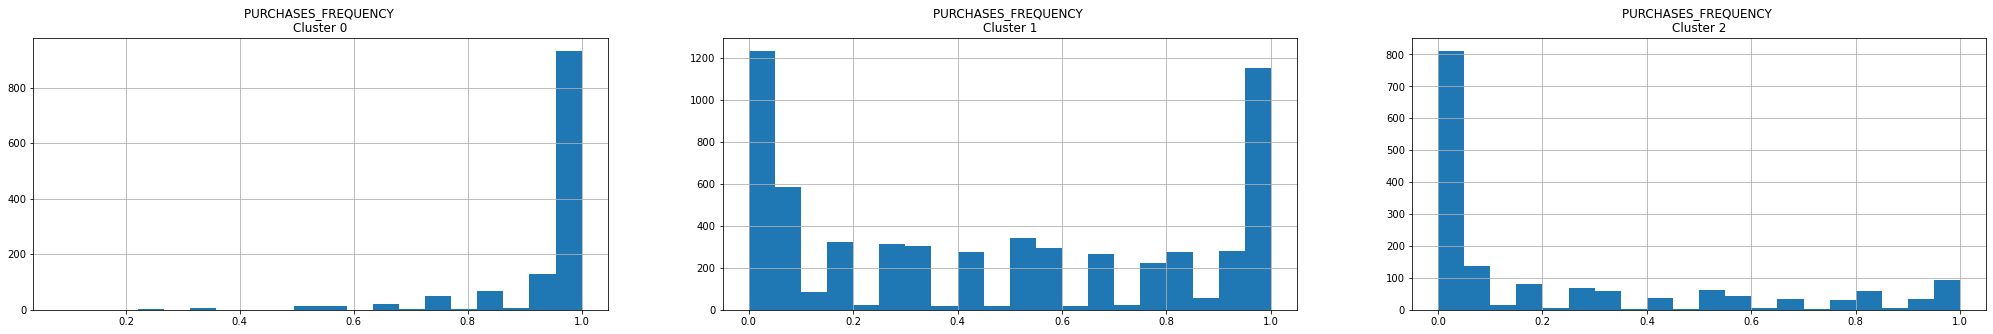

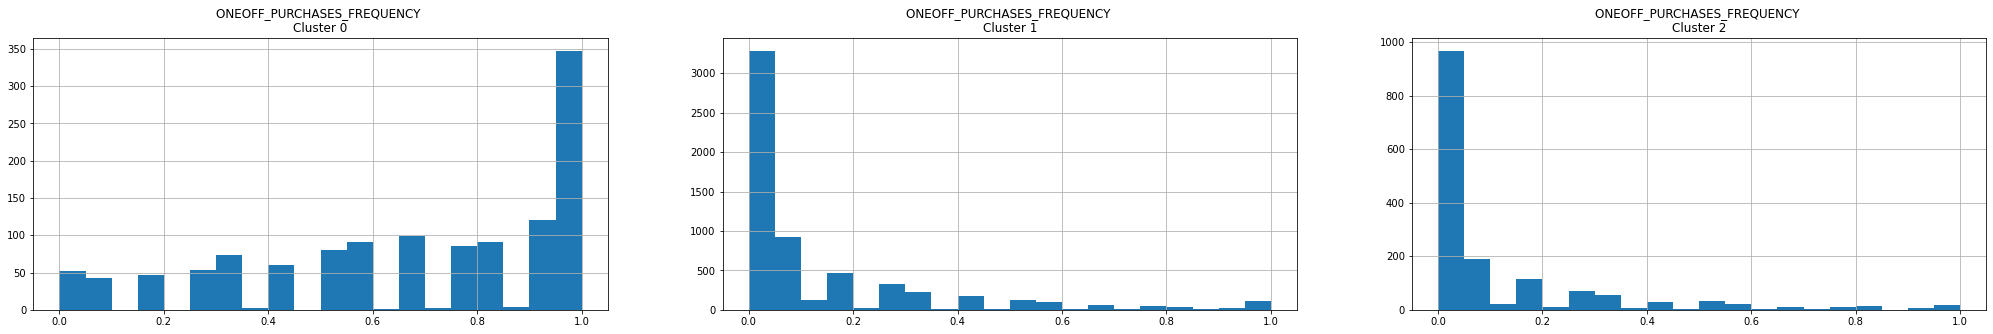

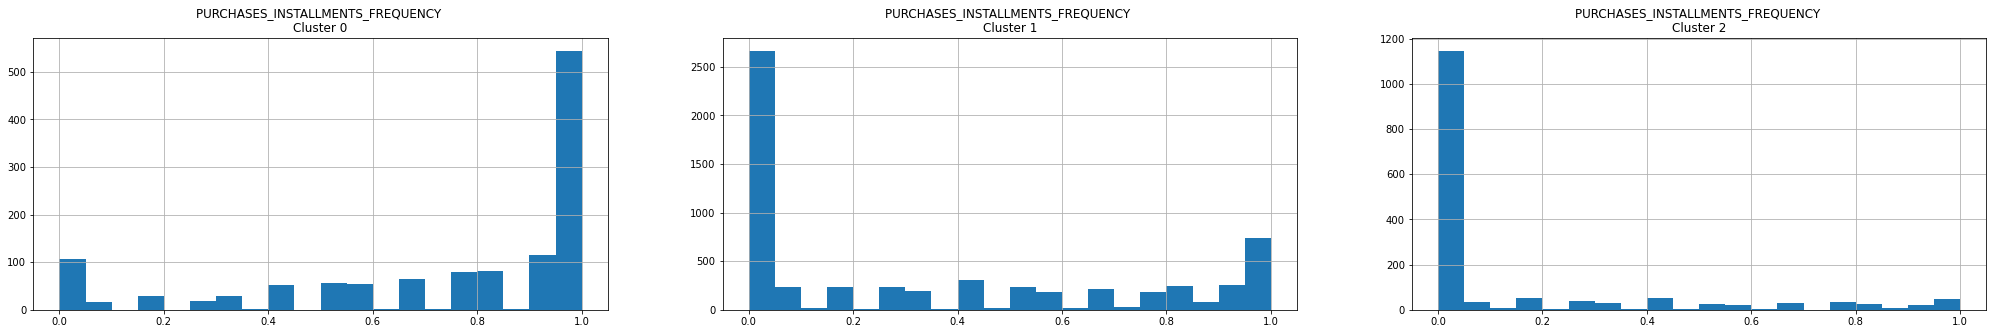

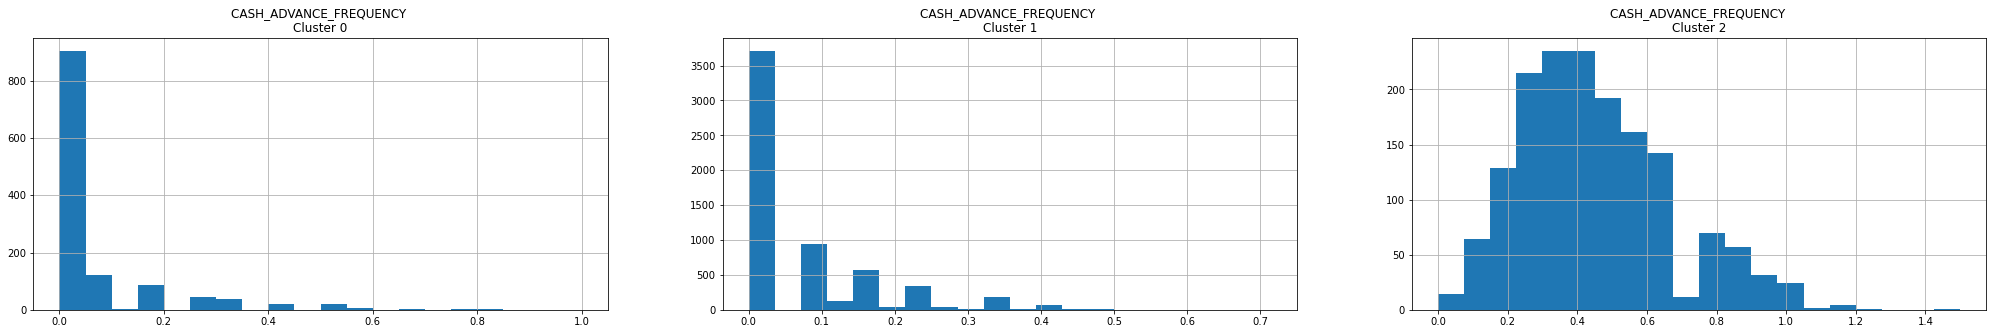

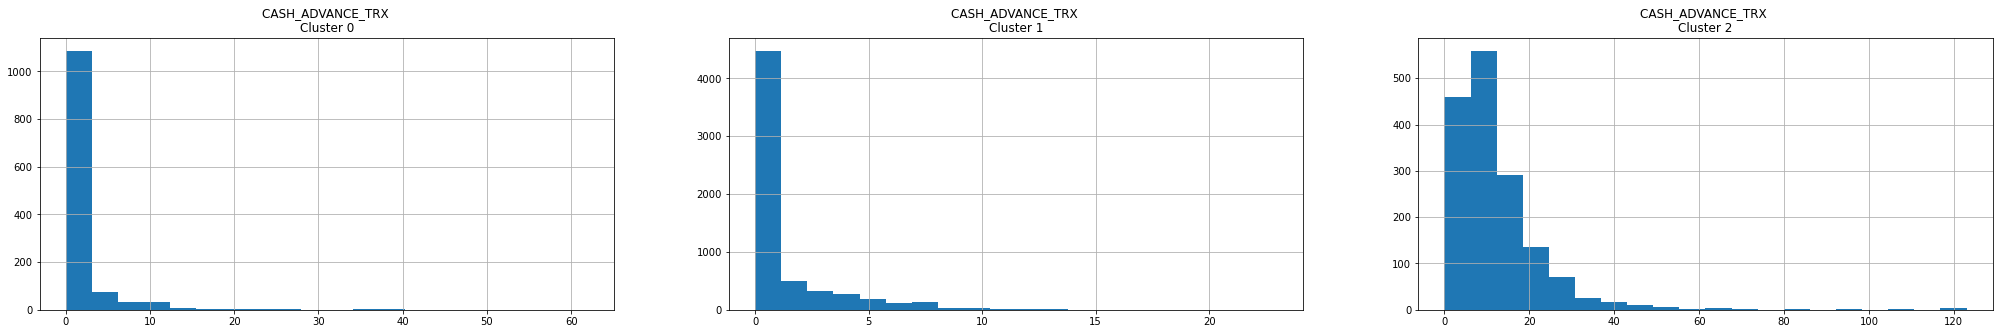

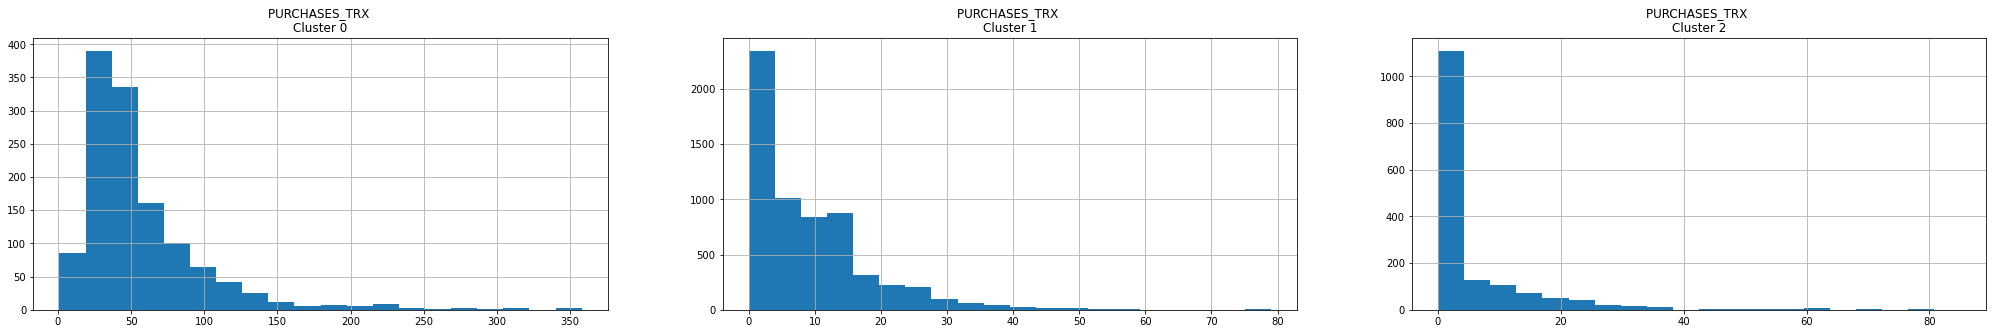

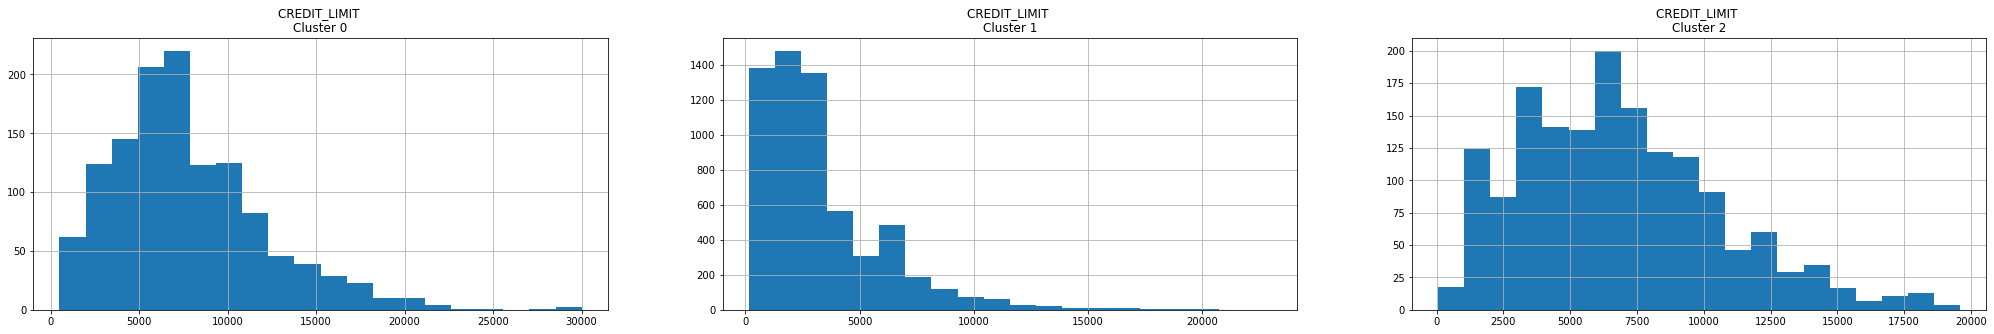

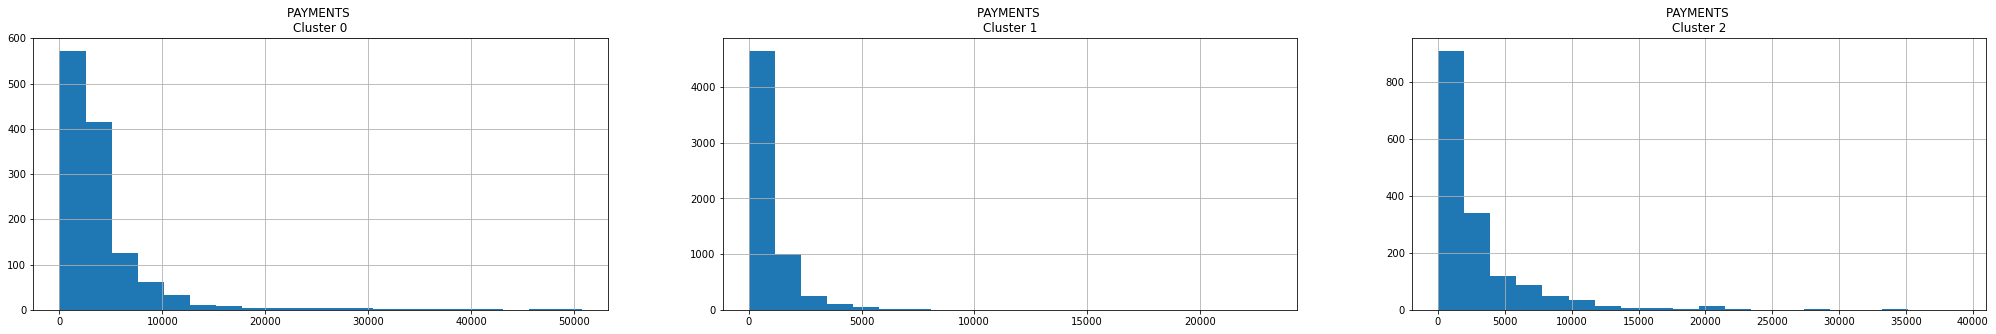

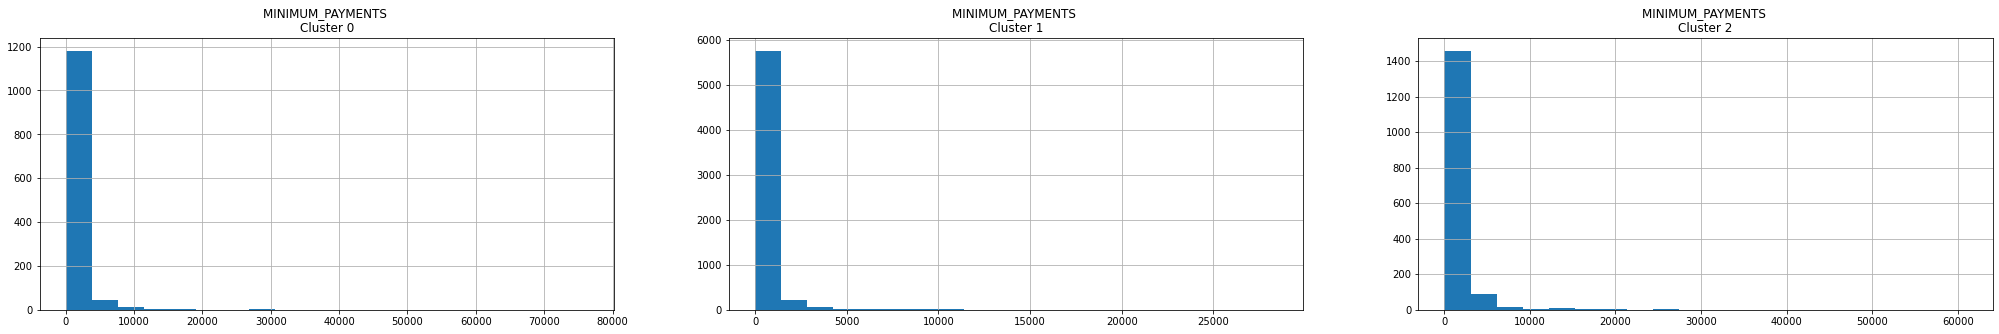

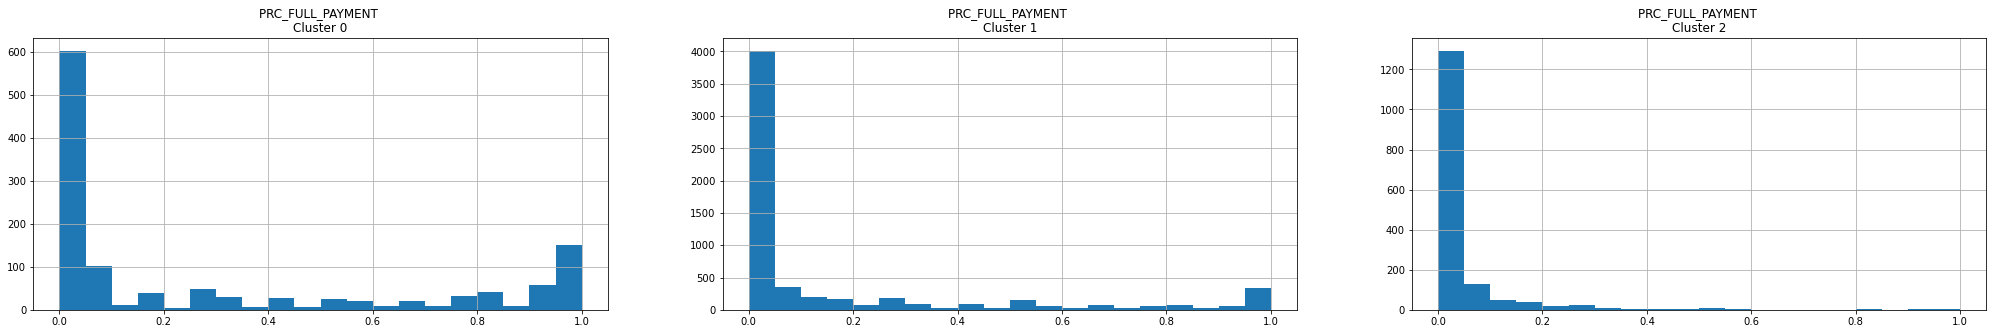

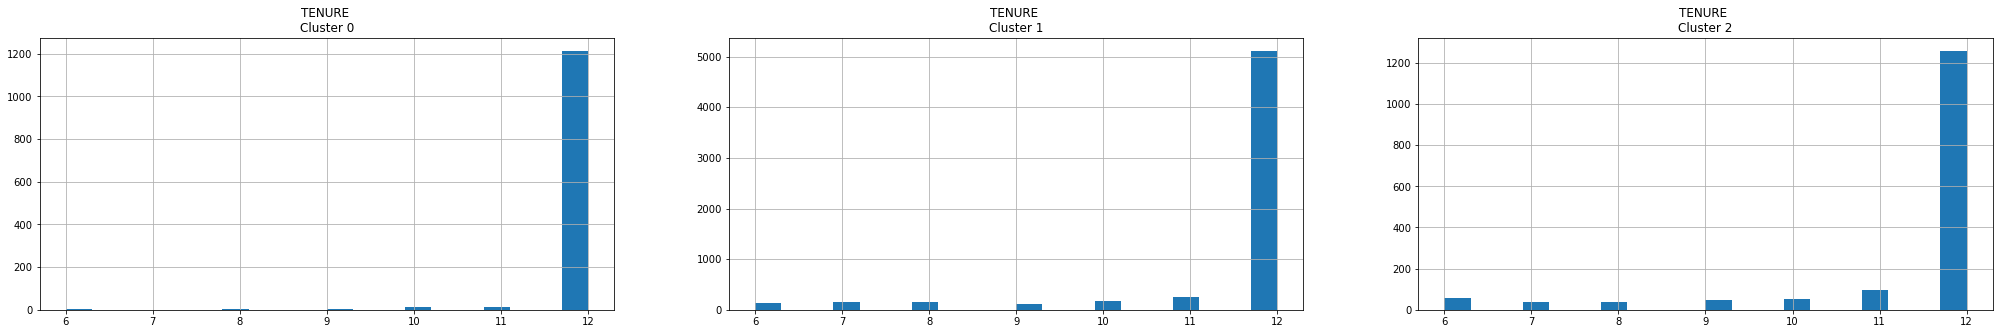

In [65]:
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(3):
    plt.subplot(1, 3, j + 1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [66]:
credit_ordered = creditcard_df_cluster.sort_values(by = 'cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
5547,3127.073601,1.0,4468.44,4432.46,35.98,0.000000,1.000000,0.833333,0.083333,0.00,0,55,4500.0,665.046852,850.247297,0.0,12,0
2054,2928.480007,1.0,5747.76,4021.77,1725.99,0.000000,1.000000,0.583333,1.000000,0.00,0,81,8000.0,4901.164291,788.689176,0.0,12,0
3742,369.384435,1.0,3303.03,87.90,3215.13,0.000000,0.833333,0.166667,0.750000,0.00,0,28,6000.0,2353.184431,173.561310,0.0,12,0
2055,3433.295973,1.0,4342.07,4247.87,94.20,0.000000,0.833333,0.666667,0.166667,0.00,0,20,11000.0,3903.861413,806.987100,0.0,12,0
3744,4283.519021,1.0,8151.36,3092.07,5059.29,2685.118122,0.833333,0.416667,0.583333,0.25,5,48,9500.0,6839.916671,1409.012750,0.0,12,0


In [67]:
credit_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
2469,3929.705042,1.0,935.71,0.00,935.71,5093.448320,0.833333,0.000000,0.750000,0.166667,3,34,6000.0,6409.769007,1447.893709,0.0,12,2
2467,6437.924230,1.0,716.76,54.46,662.30,2365.445125,1.000000,0.083333,0.916667,0.416667,10,33,7000.0,1364.331914,1968.717366,0.0,12,2
2465,5151.912071,1.0,0.00,0.00,0.00,2873.077058,0.000000,0.000000,0.000000,0.166667,4,0,7000.0,1362.424363,1240.254115,0.0,12,2
2490,4319.531807,1.0,0.00,0.00,0.00,9085.908764,0.000000,0.000000,0.000000,0.666667,19,0,7500.0,10339.938450,1348.605697,0.0,12,2
4474,5256.695330,1.0,188.60,188.60,0.00,1934.418697,0.083333,0.083333,0.000000,0.333333,4,1,9000.0,1421.954639,1452.249653,0.0,12,2


In [68]:
# Visualising the clusters
credit_ordered['cluster'].plot

In [69]:
credit_ordered.to_csv('cluster.csv')

## PCA implementation (principal component analysis) and visualization of the results

In [70]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222164, -1.07644717],
       [-1.1382918 ,  2.50646955],
       [ 0.96968955, -0.38354032],
       ...,
       [-0.92620745, -1.81077603],
       [-2.33655986, -0.65794002],
       [-0.55642322, -0.40045984]])

In [71]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682222,-1.076447
1,-1.138292,2.506470
2,0.969690,-0.383540
3,-0.873627,0.043163
4,-1.599436,-0.688576


In [72]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682222,-1.076447,1
1,-1.138292,2.506470,2
2,0.969690,-0.383540,1
3,-0.873627,0.043163,1
4,-1.599436,-0.688576,1


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

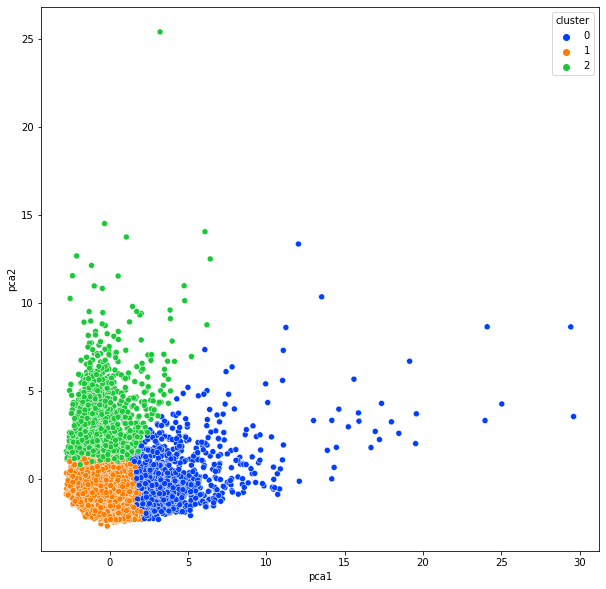

In [73]:
plt.figure(figsize=(10,10))
plt.legend(labels)
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = 'bright')

### III.2.- K Means

https://www.kaggle.com/code/gauravduttakiit/clustering-using-autoencoders-ann